## sentdex - Deep Learning tutorial

Check python&tensorflow version

In [15]:
from platform import python_version
print(python_version())

3.7.9


In [16]:
import tensorflow as tf

tf.__version__

'1.14.0'

Hide warnings

In [17]:
import warnings
warnings.filterwarnings(action='ignore')

Modelling Neural Network
- Using mnist dataset

In [18]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))  # input layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # input layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))  # dense layer (128 neurons)
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))  # 10 for # of class, softmax for probability distribution

model.compile(optimizer = 'adam',  # 
             loss = 'sparse_categorical_crossentropy',    # NN performs not to maximize ACC, but to minimize loss
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

## So far, overfitted! ##

Epoch 1/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2625 - acc: 0.9227
Epoch 2/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1065 - acc: 0.9676
Epoch 3/3
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0735 - acc: 0.9765


In [19]:
## Calculate validation loss
import numpy as np
#x_test = np.array(x_test)
#y_test = np.array(y_test)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.1005 - acc: 0.9674
0.10050884644296021 0.9674


Images after normalizing?

<function matplotlib.pyplot.show(close=None, block=None)>

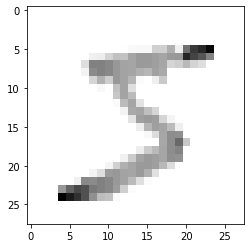

In [20]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show
# print(x_train[0])

Save the model in a form of .model

In [21]:
model.save('epic_num_reader.model')

In [22]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [23]:
predictions = new_model.predict([x_test])

In [24]:
print(predictions)

[[2.6695021e-08 4.6277133e-08 1.0411979e-05 ... 9.9760783e-01
  7.1303657e-06 3.6362871e-05]
 [9.0026653e-08 2.1425122e-03 9.9768496e-01 ... 3.3908293e-08
  5.1368534e-06 7.0348616e-11]
 [3.5412651e-08 9.9941254e-01 9.0668276e-05 ... 5.7305781e-05
  1.8262559e-04 8.5432521e-07]
 ...
 [1.6273917e-08 1.9005282e-06 4.4359268e-08 ... 6.3497951e-05
  7.7671735e-05 9.2738024e-05]
 [2.9646847e-07 1.3968105e-08 1.7643157e-07 ... 4.8942425e-06
  9.4336974e-05 1.8167520e-09]
 [1.6733031e-07 7.7604485e-11 2.8911656e-10 ... 1.6468070e-12
  2.3251128e-09 4.3377350e-11]]


Prediction result?
- Since we used 'softmax' as an optimizer, the results will come out in a form of probabilities

In [25]:
## prediction?

import numpy as np
print(np.argmax(predictions[0]))

7


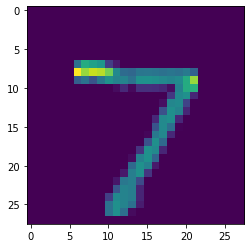

In [26]:
plt.imshow(x_test[0])
plt.show()